In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = os.getcwd()+'/'

In [3]:
data = pd.read_csv(path+'card_transactions.csv')

In [4]:
data.shape

(96708, 10)

In [5]:
data.columns

Index(['Recordnum', 'Cardnum', 'Date', 'Merchantnum', 'Merch Description',
       'Merchant State', 'Merchant Zip', 'Transtype', 'Amount', 'Fraud'],
      dtype='object')

In [6]:
data.head()

,Recordnum,Cardnum,Date,Merchantnum,Merch Description,Merchant State,Merchant Zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [7]:
data['Recordnum'].head()

0    1
1    2
2    3
3    4
4    5
Name: Recordnum, dtype: int64

In [8]:
len(data)

96708

In [9]:
data.dtypes

Recordnum              int64
Cardnum                int64
Date                  object
Merchantnum           object
Merch Description     object
Merchant State        object
Merchant Zip         float64
Transtype             object
Amount               float64
Fraud                  int64
dtype: object

In [19]:
data['Recordnum'] = data['Recordnum'].astype('str')
data['Cardnum'] = data['Cardnum'].astype('str')
data['Date'] = pd.to_datetime(data['Date'])
data['Merchant Zip'] = data['Merchant Zip'].astype('str')
data['Fraud'] = data['Fraud'].astype('str')

In [30]:
pd.options.display.float_format = '{:.2f}'.format

In [34]:
describe = data.describe().T.iloc[:,[0,1,2,3,5,7]]

In [35]:
describe['populated_rate'] = describe['count']/len(data)

In [36]:
describe

,count,mean,std,min,50%,max,populated_rate
Amount,96708.00,427.87,10008.47,0.01,137.90,3102045.53,1.00


In [47]:
summary_table = data.describe(include=['object','datetime64[ns]']).transpose().iloc[:,:2]

In [48]:
summary_table['populated_rate'] = summary_table['count']/len(data)

In [49]:
summary_table

,count,unique,populated_rate
Recordnum,96708,96708,1.00
Cardnum,96708,1644,1.00
Date,96708,365,1.00
Merchantnum,93333,13090,0.97
Merch Description,96708,13125,1.00
Merchant State,95513,227,0.99
Merchant Zip,96708,4568,1.00
Transtype,96708,4,1.00
Fraud,96708,2,1.00


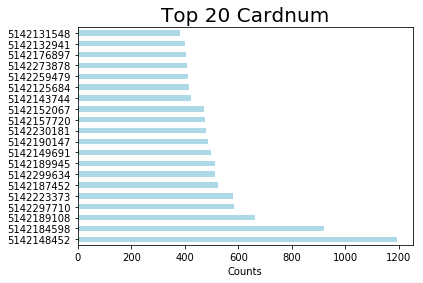

In [42]:
data['Cardnum'].value_counts().head(20).plot(kind= 'barh',color = 'lightblue')
#plt.xscale('symlog')
plt.title('Top 20 Cardnum',fontsize=20)
plt.xlabel('Counts')
plt.show()

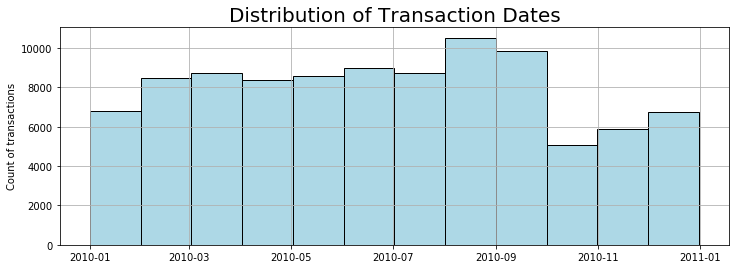

In [39]:
fig = plt.figure(figsize = (12,4))
fig = data['Date'].hist(bins=12,ec='black',color='lightblue')
plt.ylabel('Count of transactions',fontsize = 10)
plt.title('Distribution of Transaction Dates',fontsize = 20)
plt.show()

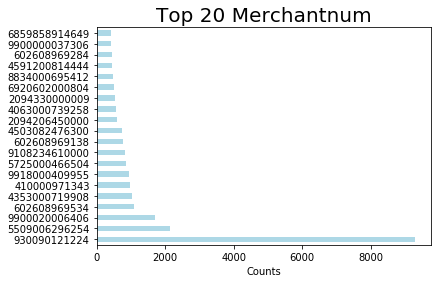

In [44]:
data['Merchantnum'].value_counts().head(20).plot(kind= 'barh',color = 'lightblue')
#plt.xscale('symlog')
plt.title('Top 20 Merchantnum',fontsize=20)
plt.xlabel('Counts')
plt.show()

In [14]:
data.query('Merchantnum == "930090121224"')['Merchant Zip'].unique()

array([38118.])

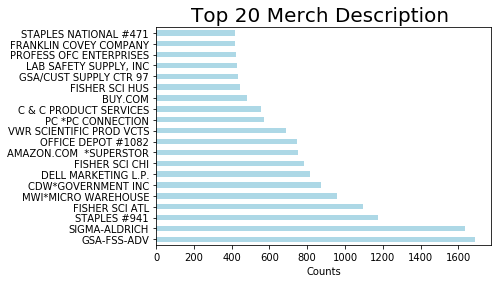

In [46]:
data['Merch Description'].value_counts().head(20).plot(kind= 'barh',color = 'lightblue')
#plt.xscale('symlog')
plt.title('Top 20 Merch Description ',fontsize=20)
plt.xlabel('Counts')
plt.show()

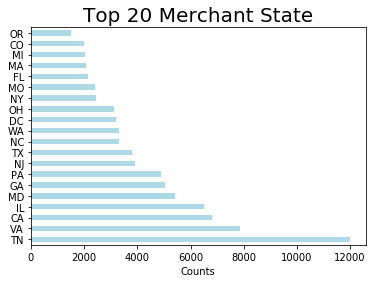

In [47]:
data['Merchant State'].value_counts().head(20).plot(kind= 'barh',color = 'lightblue')
#plt.xscale('symlog')
plt.title('Top 20 Merchant State',fontsize=20)
plt.xlabel('Counts')
plt.show()

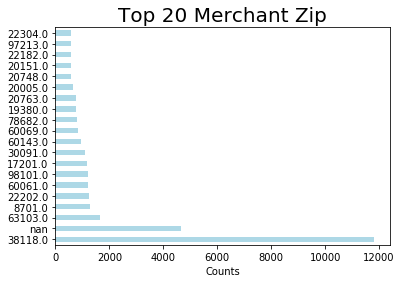

In [48]:
data['Merchant Zip'].value_counts().head(20).plot(kind= 'barh',color = 'lightblue')
#plt.xscale('symlog')
plt.title('Top 20 Merchant Zip',fontsize=20)
plt.xlabel('Counts')
plt.show()

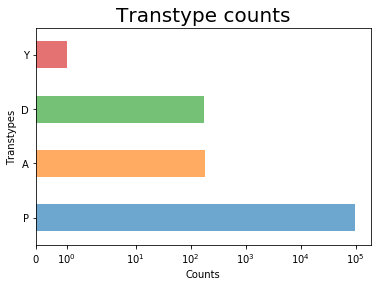

In [60]:
data['Transtype'].value_counts().plot(kind= 'barh',alpha = 0.65)#,color = ('lightblue','pink','lightgreen','lightyellow'))
#plt.text(data['fraud'].value_counts()[1]-5000, 1.3, str(data['fraud'].value_counts()[1]))
#plt.text(data['fraud'].value_counts()[0]-5000, 0.3, str(data['fraud'].value_counts()[0]))
plt.xscale('symlog')
plt.xlabel('Counts')
plt.title('Transtype counts',fontsize=20)
plt.ylabel('Transtypes')
plt.show()

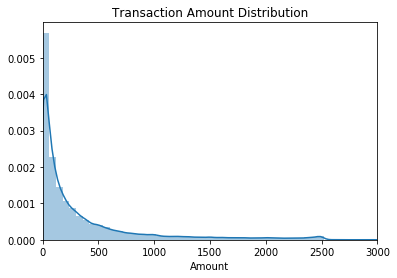

In [81]:
upper = 3000
sns.distplot(data.query('Amount <= @upper')['Amount'])
plt.xlim(0,upper)
plt.title('Transaction Amount Distribution')
plt.show()

In [56]:
pd.DataFrame(sorted(data['Amount'])[::-1][:10],columns=['Top 10 Amount'])

,Top 10 Amount
0,3102045.53
1,47900.00
2,30372.46
3,28392.84
4,27218.00
5,26910.00
6,25805.35
7,25000.00
8,24990.00
9,24946.90


In [55]:
data.query('Amount==3102045.53').T

,52593
Recordnum,52594
Cardnum,5142189135
Date,2010-07-13 00:00:00
Merchantnum,NaN
Merch Description,INTERMEXICO
Merchant State,NaN
Merchant Zip,nan
Transtype,P
Amount,3102045.53
Fraud,0


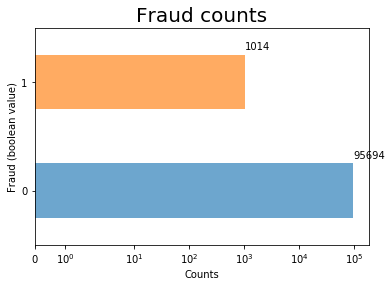

In [9]:
data['Fraud'].value_counts().plot(kind= 'barh',alpha=0.65)
plt.text(data['Fraud'].value_counts()[1], 1.3, str(data['Fraud'].value_counts()[1]))
plt.text(data['Fraud'].value_counts()[0], 0.3, str(data['Fraud'].value_counts()[0]))
plt.xscale('symlog')
plt.xlabel('Counts')
plt.title('Fraud counts',fontsize=20)
plt.ylabel('Fraud (boolean value)')
plt.show()